In [1]:
import numpy as np
import matplotlib.pyplot as plt
import visa
import time
import datetime as dt
import importlib.util
spec = importlib.util.spec_from_file_location("FS740", "driver/FS740.py")
FS740 = importlib.util.module_from_spec(spec)
spec.loader.exec_module(FS740)

In [2]:
rm = visa.ResourceManager()
clock_addr = 'COM4'
protocol = 'RS232'

In [3]:
def chunks(l,n):
    lst = []
    for i in range(0, len(l), n):
        lst.append(l[i:i+n])
    return lst

id | snr | azimuth | elevation
17 |  28 |     350 |        70
28 |  25 |     151 |        61
19 |  41 |     300 |        51
 6 |  26 |     232 |        40
 2 |  19 |     234 |         5
signal : 27


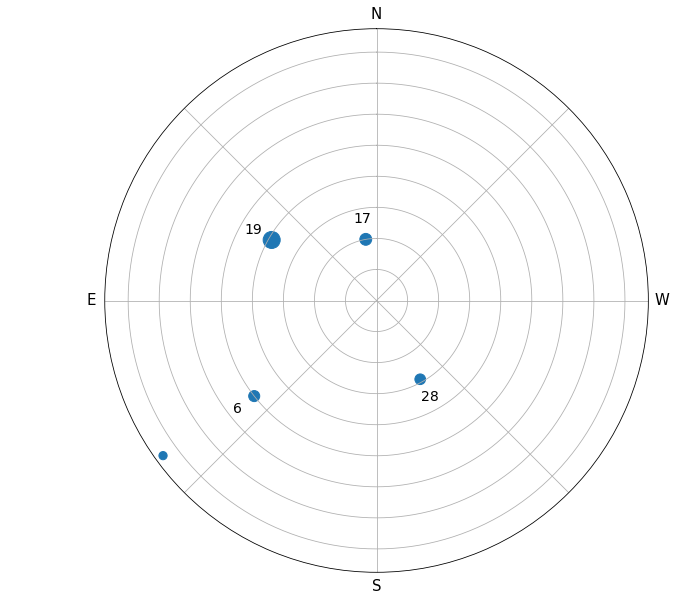

In [4]:
remap_radial = lambda r: 90 - r
with FS740.FS740(rm, clock_addr, protocol) as clock:
    response = clock.GPSSatelliteTrackingStatus()

vals = chunks(response.split(','),8)
    
ids, signal, elevation, azimuth = zip(*[(int(val[0]), int(val[4]), int(val[5]), int(val[6])) for val in vals if (val[3] =='0') and (val[0] != '0')])
    
fig, ax = plt.subplots(figsize = (10,10), subplot_kw = {'projection': 'polar'})

ax.set_rmax(90)
ax.set_theta_direction(-1)
ax.set_theta_zero_location("N")
# sc = ax.scatter(np.array(azimuth)*np.pi/180, elevation, np.array(signal)**1.6, c = signal, vmin = 0, vmax = 60,
#                 cmap = 'viridis')
sc = ax.scatter(np.array(azimuth)*np.pi/180, list(map(remap_radial, elevation)), np.array(signal)**1.9/4
                )

ax.set_xticklabels(['N', '', 'W', '', 'S', '', 'E', ''], fontsize = 15)
ax.set_yticklabels([])
[ax.annotate(str(idS), xy = (azi*np.pi/180, remap_radial(ele)+6.7),
            verticalalignment = 'center', horizontalalignment = 'center', 
            fontsize = 14) for idS, azi, ele in zip(ids, azimuth, elevation)]
# cbar = fig.colorbar(sc);
# cbar.ax.set_ylabel('dBHz', fontsize = 15)

header = 'id | snr | azimuth | elevation'
print(header)
print('='*len(header))
for idS, sig, azi, ele in zip(ids, signal, azimuth, elevation):
    print('{0:2d} | {1:3d} | {2:7d} | {3:9d}'.format(idS, sig, azi, ele))
print('='*len(header))
print('signal : {0:d}'.format(int(np.average(signal))))

In [5]:
with FS740.FS740(rm, clock_addr, protocol) as clock:
    response = clock.GPSSatelliteTrackingStatus()

In [6]:
%%time
with FS740.FS740(rm, clock_addr, protocol) as clock:
    print("IDN : ",clock.ReadIDN())
    print("TIME : ",clock.ReadSystemDate(), clock.ReadSystemTime())
    print("TIME ALI : ",clock.ReadGPSConfigAlignment())
    print("STATE : ",clock.TBaseState())
    print("HOLD DUR : ",clock.TBaseStateHoldoverDuration())
    print("WARM DUR : ",clock.TBaseStateWarumpDuration())
    print("LOCK DUR : ",clock.TBaseStateLockDuration()) 
    print("FCONTROL : ",clock.ReadTBaseFControl())
    print("HMODE : ",clock.ReadTBaseConfigHMode())
    print("BWIDTH : ",clock.ReadTBaseConfigBWidth())
    print("LOCK : ",clock.ReadTBaseConfigLock())
    print("TINT LIM : ",clock.ReadTBaseConfigTIntervalLimit())
    print("TINT : ",clock.TBaseTInterval())
    print("TCON CUR : ",clock.ReadTBaseTConstant())
    print("TCON TAR : ",clock.ReadTBaseTConstant("TARG"))
    print("GPS POS : ",clock.GPSPosition())
    print("GPS TRACK : ",clock.GPSSatelliteTracking())
    print("GPS TRACK STAT : ",clock.GPSSatelliteTrackingStatus())
    print("GPS MODE : ",clock.ReadGPSConfigMode())
    print("GPS QUAL : ",clock.ReadGPSConfigQuality())
    print("GPS ADELAY : ",clock.ReadGPSConfigADelay())

IDN :  Stanford Research Systems,FS740,s/n001165,ver3.06.11
TIME :  2019,1,7 5,33,18.899749315596
STATE :  LOCK
HOLD DUR :  0
WARM DUR :  134
LOCK DUR :  53838
FCONTROL :  1.793916E+00
HMODE :  WAIT
BWIDTH :  AUT
LOCK :  1
TINT LIM :  1.00000000000000E-06
TINT :  8.95070357183033E-09
TCON CUR :  2000
TCON TAR :  2000
GPS POS :  7.21118709649356315E-01,-1.27274096067011944E+00,1.32376295748067774E+00
GPS TRACK :  11,17,28,19,6,2,3,22,1,24,11,30
GPS TRACK STAT :  17,1,1,0,28,70,350,0,28,1,1,0,26,61,151,0,19,1,1,0,41,51,300,0,6,1,1,0,25,40,232,0,2,1,0,0,19,5,234,0,3,0,0,1,0,40,82,0,22,0,0,1,0,29,59,0,1,0,0,1,0,24,49,0,24,0,0,1,0,16,305,0,11,0,0,1,0,11,66,0,30,0,0,1,0,4,190,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GPS MODE :  1,0.00000000E+00,0.00000000E+00
GPS QUAL :  3SAT
GPS ADELAY :  -3.54590000000000001E-08
Wall time: 587 ms


In [7]:
"{0:16b}".format(6169)

'   1100000011001'

In [8]:
bin(6169)

'0b1100000011001'

In [9]:
bin(1)

'0b1'